In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

data =[]
files = []
for f in glob.glob('*_Stages_Times_Sec.csv'):
    files.append(f)
    temp_df = pd.read_csv(f)
    data.append(temp_df)
    print(f'Δημιουργήθηκε dataframe για το {f} με {temp_df.shape}')


total = pd.concat(data, axis=0)


Δημιουργήθηκε dataframe για το Croatia_Stages_Times_Sec.csv με (1065, 7)
Δημιουργήθηκε dataframe για το Estonia_Stages_Times_Sec.csv με (1017, 7)
Δημιουργήθηκε dataframe για το Finland_Stages_Times_Sec.csv με (1269, 7)
Δημιουργήθηκε dataframe για το Mexico_Stages_Times_Sec.csv με (654, 7)
Δημιουργήθηκε dataframe για το MonteCarlo_Stages_Times_Sec.csv με (1290, 7)
Δημιουργήθηκε dataframe για το Portugal_Stages_Times_Sec.csv με (1338, 7)
Δημιουργήθηκε dataframe για το Safari_Stages_Times_Sec.csv με (541, 7)
Δημιουργήθηκε dataframe για το Sardegna_Stages_Times_Sec.csv με (1261, 7)
Δημιουργήθηκε dataframe για το Sweden_Stages_Times_Sec.csv με (903, 7)


In [2]:
min_value = total.groupby(['Race', 'ss'])['time_SS_sec'].min()

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race    ss          
Croatia 1      717.7
        2      918.1
        3      330.8
        4      288.2
        5      726.8
...              ...
Sweden  14     501.8
        15     349.2
        16     761.0
        17     757.0
        18     342.0

[178 rows x 1 columns]

In [3]:
total_ss_times_F = total.merge(min_value2, on=['Race', 'ss'])
total_ss_times_F['SS.'] = total_ss_times_F['Race'] + '_' +  total_ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7,Croatia_01
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7,Croatia_01
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7,Croatia_01
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7,Croatia_01
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7,Croatia_01
...,...,...,...,...,...,...,...,...,...
9333,64,Otake Nao,RC4,18,Sweden,41,427.8,342.0,Sweden_18
9334,7,Loubet P.,RC1,18,Sweden,42,490.6,342.0,Sweden_18
9335,35,Al-Rashed,RC2,18,Sweden,43,507.1,342.0,Sweden_18
9336,26,Kaur Egon,RC2,18,Sweden,44,536.6,342.0,Sweden_18


In [4]:
total_ss_times_F['diff']=total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time']
total_ss_times_F['diff%']=(total_ss_times_F['time_SS_sec'] - total_ss_times_F['min_time'])/total_ss_times_F['min_time']*100
total_ss_times_F

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7,Croatia_01,0.0,0.000000
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7,Croatia_01,2.6,0.362268
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7,Croatia_01,10.5,1.463007
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7,Croatia_01,11.3,1.574474
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7,Croatia_01,12.3,1.713808
...,...,...,...,...,...,...,...,...,...,...,...
9333,64,Otake Nao,RC4,18,Sweden,41,427.8,342.0,Sweden_18,85.8,25.087719
9334,7,Loubet P.,RC1,18,Sweden,42,490.6,342.0,Sweden_18,148.6,43.450292
9335,35,Al-Rashed,RC2,18,Sweden,43,507.1,342.0,Sweden_18,165.1,48.274854
9336,26,Kaur Egon,RC2,18,Sweden,44,536.6,342.0,Sweden_18,194.6,56.900585


In [5]:
total_ss_times_WRC = total_ss_times_F[total_ss_times_F['Group'].str.contains('RC1')]
total_ss_times_WRC

,No.,Crew,Group,ss,Race,cou,time_SS_sec,min_time,SS.,diff,diff%
0,17,Ogier S.,RC1,1,Croatia,1,717.7,717.7,Croatia_01,0.0,0.000000
1,11,Neuville,RC1,1,Croatia,2,720.3,717.7,Croatia_01,2.6,0.362268
2,8,Tänak Ott,RC1,1,Croatia,3,728.2,717.7,Croatia_01,10.5,1.463007
3,69,Rovanperä,RC1,1,Croatia,4,729.0,717.7,Croatia_01,11.3,1.574474
4,33,Evans Elf,RC1,1,Croatia,5,730.0,717.7,Croatia_01,12.3,1.713808
...,...,...,...,...,...,...,...,...,...,...,...
9296,8,Tänak Ott,RC1,18,Sweden,4,342.7,342.0,Sweden_18,0.7,0.204678
9297,42,Breen Cra,RC1,18,Sweden,5,342.9,342.0,Sweden_18,0.9,0.263158
9298,11,Neuville,RC1,18,Sweden,6,344.7,342.0,Sweden_18,2.7,0.789474
9301,37,Bertelli,RC1,18,Sweden,9,359.8,342.0,Sweden_18,17.8,5.204678


In [6]:
total_ss_times_F4 = pd.pivot_table(total_ss_times_WRC, values='diff', 
                                index=['Race', 'SS.'], 
                                columns='Crew', dropna=True)
total_ss_times_F4

Crew                Bertelli    Breen  Cra  Evans  Elf  Katsuta  T  \
Race    SS.                                                          
Croatia Croatia_01         NaN         NaN        12.3        29.2   
        Croatia_02         NaN         NaN         4.2        17.1   
        Croatia_03         NaN         NaN         3.3         4.5   
        Croatia_04         NaN         NaN         1.8         5.2   
        Croatia_05         NaN         NaN         4.8        24.5   
...                        ...         ...         ...         ...   
Sweden  Sweden_14         33.5         3.6         5.6        15.1   
        Sweden_15         26.7        10.3         6.5         3.6   
        Sweden_16         57.8         4.5        16.2        11.2   
        Sweden_17         53.6         3.8        18.6        11.4   
        Sweden_18         17.8         0.9         0.6         NaN   

Crew                Lappi  Esa  Latvala  J  Loubet  P.  Neuville    \
Race    SS.                                                          
Croatia Croatia_01        23.0         NaN        30.3         2.6   
        Croatia_02         5.6         NaN        17.8         0.0   
        Croatia_03         7.3         NaN         7.7         0.8   
        Croatia_04         4.5         NaN         5.5         2.1   
        Croatia_05         7.9         NaN        13.0         7.2   
...                        ...         ...         ...         ...   
Sweden  Sweden_14          0.2         NaN        14.0         0.0   
        Sweden_15          3.0         NaN         6.5         0.0   
        Sweden_16          8.4         NaN        39.8         2.7   
        Sweden_17         16.7         NaN        31.6         0.0   
        Sweden_18          0.0         NaN       148.6         2.7   

Crew                Ogier  S.   Rovanperä   Serderidis  Sordo  Dan  \
Race    SS.                                                          
Croatia Croatia_01         0.0        11.3         NaN         NaN   
        Croatia_02        92.6       137.4         NaN         NaN   
        Croatia_03         0.0         8.1         NaN         NaN   
        Croatia_04         0.0         4.6         NaN         NaN   
        Croatia_05         0.0         5.8         NaN         NaN   
...                        ...         ...         ...         ...   
Sweden  Sweden_14          NaN         3.7         NaN         NaN   
        Sweden_15          NaN         3.8         NaN         NaN   
        Sweden_16          NaN         0.0         NaN         NaN   
        Sweden_17          NaN         6.0         NaN         NaN   
        Sweden_18          NaN         0.7         NaN         NaN   

Crew                Suninen  T  Tänak  Ott  
Race    SS.                                 
Croatia Croatia_01         NaN        10.5  
        Croatia_02         NaN        12.1  
        Croatia_03         NaN         3.8  
        Croatia_04         NaN         1.3  
        Croatia_05         NaN         5.8  
...                        ...         ...  
Sweden  Sweden_14          NaN         0.8  
        Sweden_15          NaN         4.0  
        Sweden_16          NaN         1.5  
        Sweden_17          NaN         6.9  
        Sweden_18          NaN         0.7  

[178 rows x 14 columns]

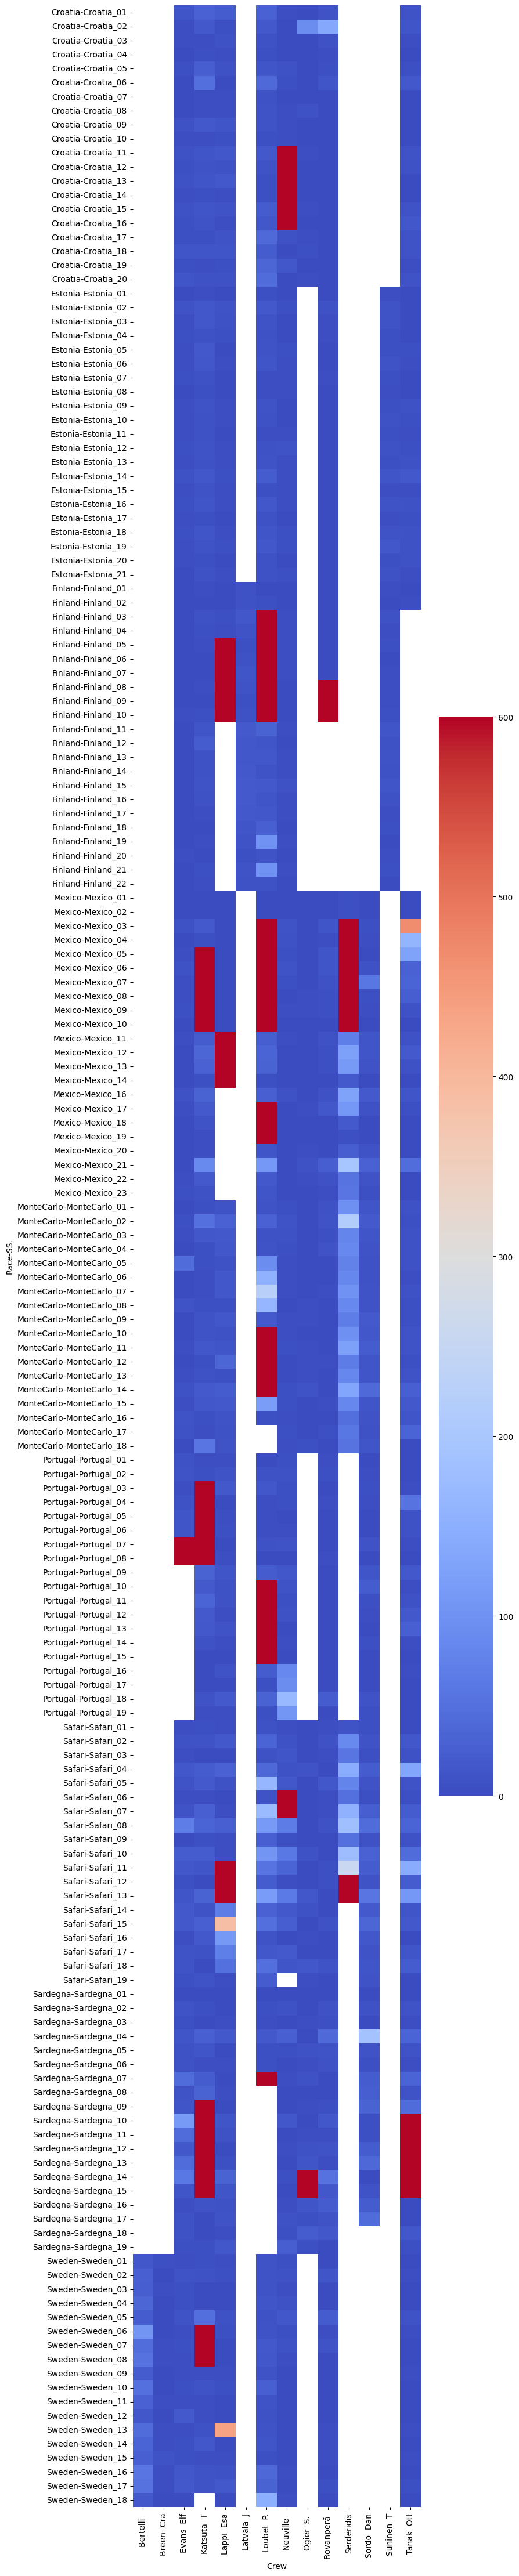

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(8,56)
#ax.set(xlabel='Time', ylabel='Value')
#ax.xaxis.label.set(fontsize=20, position=(0.9, 0))
#ax.yaxis.label.set(fontsize=15, position=(0, 0.9))
Heatmap_ALL = sns.heatmap(total_ss_times_F4, cmap='coolwarm')
#Heatmap_ALL.set_yticklabels(total_ss_times_WRC['Crew'], size = 15)
plt.savefig("Rc1.jpg")
plt.show()